## Problem Statement

One of the indian companies selling the old/refurbished cars to the customers, in this case study you have to predict the car price based on the various feature of the cars, there are around 1700+ data points based on that we need to proceed and create the linear regression model. 

**Data Dictionary**

**Company** - Car's company

**Name** - Name of the car model

**Year** - Make year of the car

**Selling Price** -	Selling price of the car (Dependent variable)

**Kilometer driven** -	Total kms driven by the car

**Fuel** -	Cars fuel type

**Seller Type** - Type of the seller

**Transmission** -	If the car is automatic or manual

**Owner** -	Owner type of the car

In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Car_Details_Car_Dekho.csv')

In [5]:
df.head()

,Company,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
1,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
2,Honda,Honda City V MT,2018,930000,14500,Petrol,Dealer,Manual,First Owner
3,Honda,Honda City i DTEC V,2014,560000,74000,Diesel,Individual,Manual,Second Owner
4,Honda,Honda City i DTEC VX,2014,675000,90000,Diesel,Dealer,Manual,First Owner


In [6]:
#.columns command will help us understand the columns present in the dataset
df.columns

Index(['Company', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [7]:
#Len command will help us understand the total number of records present in the dataset
len(df)

1720

In [8]:
#The below command will help us understand the total number of columns present in the dataset
len(df.columns)

9

In [9]:
#Here are the few commands which will help us to understand the basic data 
#The info command will help us to understand the different columns present in the dataset and its datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        1720 non-null   object
 1   name           1720 non-null   object
 2   year           1720 non-null   int64 
 3   selling_price  1720 non-null   int64 
 4   km_driven      1720 non-null   int64 
 5   fuel           1720 non-null   object
 6   seller_type    1720 non-null   object
 7   transmission   1720 non-null   object
 8   owner          1720 non-null   object
dtypes: int64(3), object(6)
memory usage: 121.1+ KB


# Exploratory Data Analysis


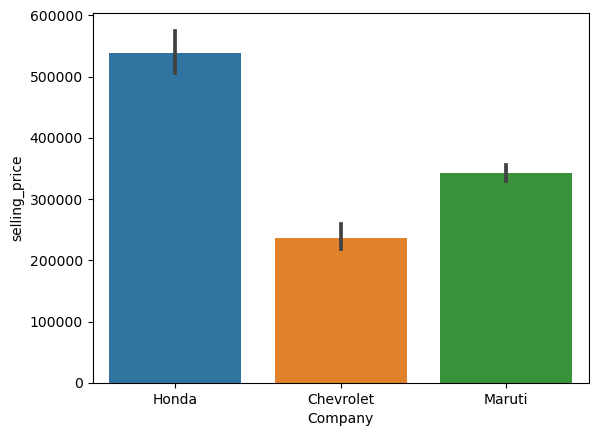

In [11]:
sns.barplot(x = df['Company'], y = df['selling_price'])
plt.show()

**Honda Cars are having overall higher selling price**

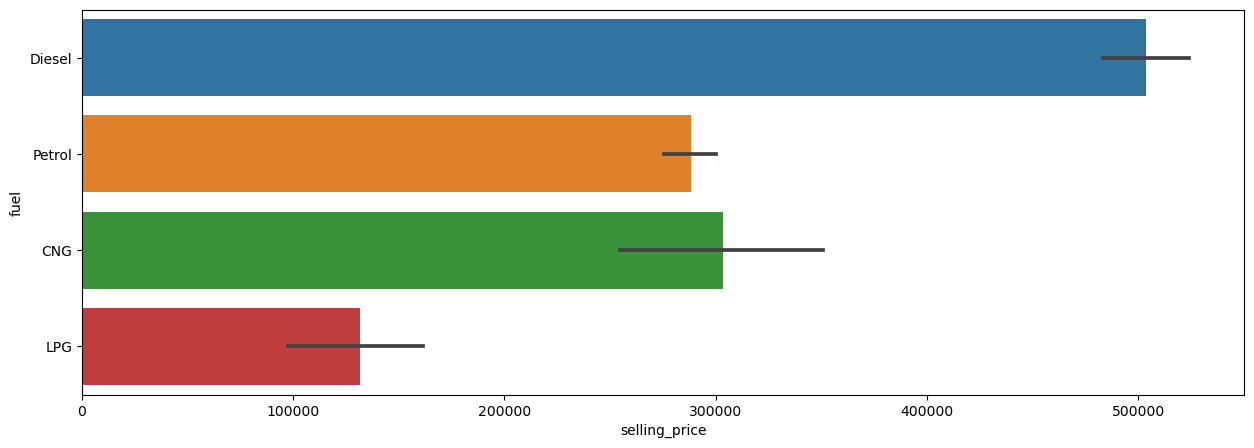

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'fuel',x='selling_price')
plt.show()

**Diesel cars are having higher selling price**

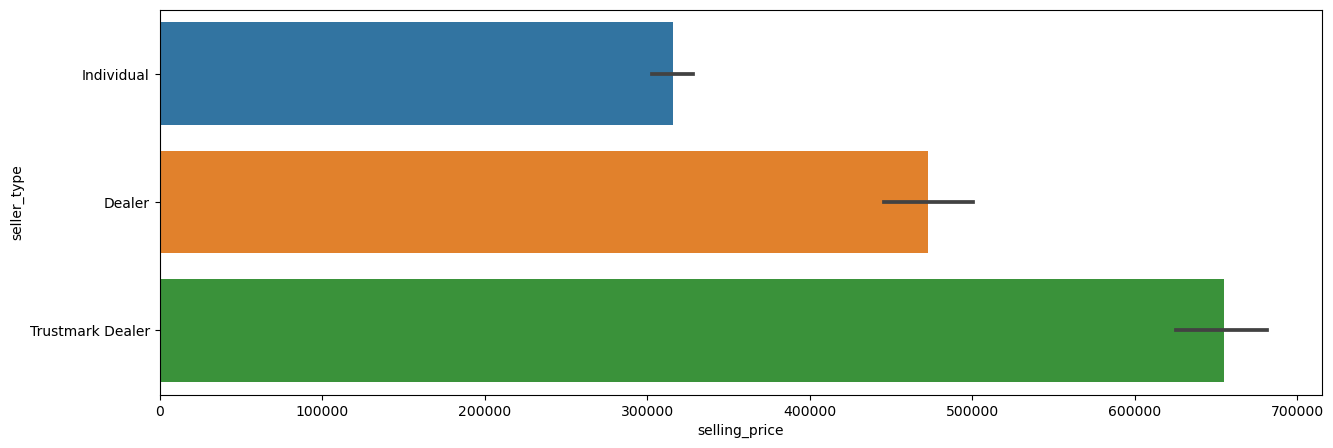

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'seller_type',x='selling_price')
plt.show()

**Trustmark dealers are having higher selling price**

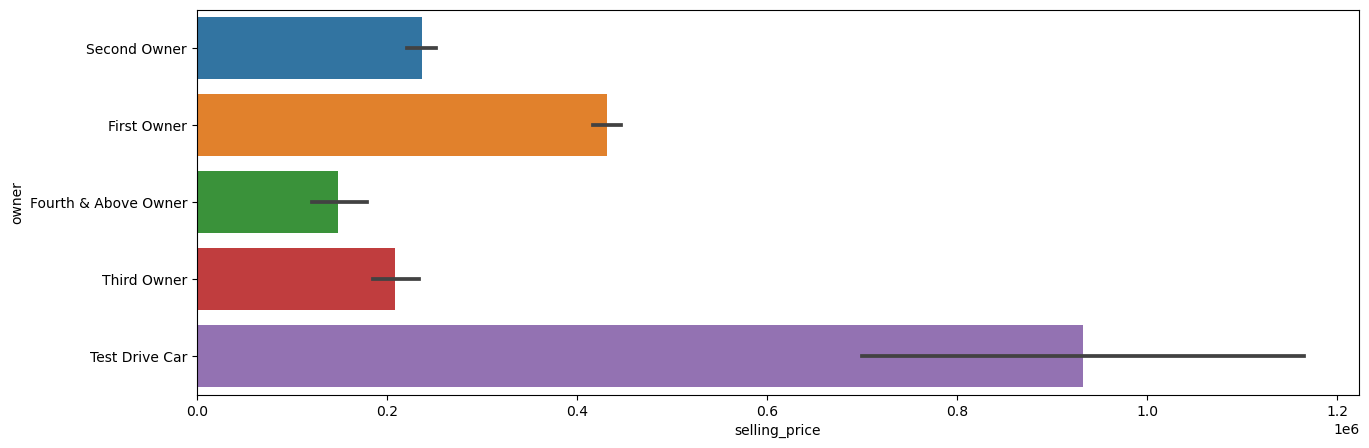

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'owner',x='selling_price')
plt.show()

**Test Drive cars are having higher price**

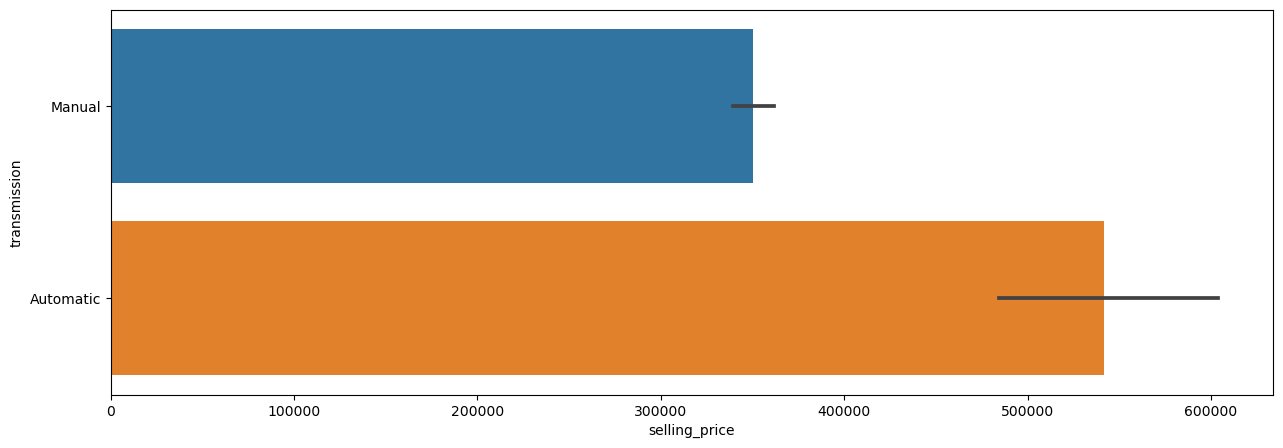

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'transmission',x='selling_price')
plt.show()

**Automatic Cars are having higher selling price**

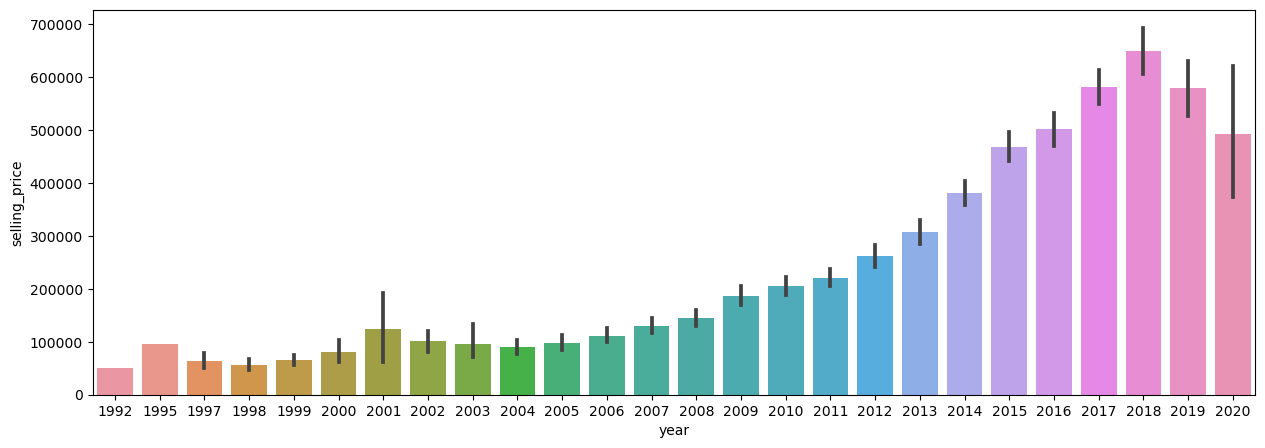

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, x = 'year',y='selling_price')
plt.show()

**Newer the car is, higher the selling price it will have**

C:\Users\kgk.varma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

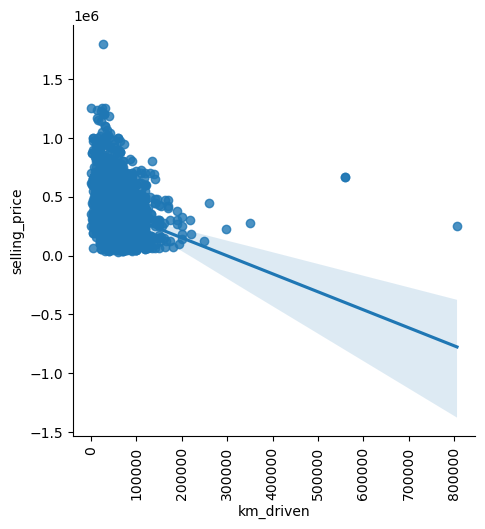

In [22]:
plt.figure(figsize=(15,5))
sns.lmplot(data=dataset, x = 'km_driven',y='selling_price')
plt.xticks(rotation = 90)
plt.show()

**If the Kilometer driven are lesser more the price is**

#  Outlier Treatment

In [24]:
def outlier_treatment(dataframe):
    # Select only numeric columns
    numeric_cols = dataframe.select_dtypes(include=[float, int])
    
    # Calculate Q1, Q3, and IQR only for numeric columns
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter the outliers based on IQR
    df_rem_out = dataframe[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df_rem_out

# Now apply the function
df = outlier_treatment(df)


In [25]:
len(dataset)

1720

**No Outliers found**

# Missing Value Treatment


In [27]:
df.isnull().sum()

Company          0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

**In this dataset there are no missing values so we are good to proceed to the next steps.**

# Encoding

In [30]:


# Separating the numerical and categorical columns
def data_type(dataset):
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(df)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(dataset):
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(df)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(dataset, categorical):
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset = encoding(df, categorical)

In [29]:
dataset

,Company,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,1,79,2014,450000,141000,1,1,1,2
1,1,79,2014,450000,141000,1,1,1,2
2,1,110,2018,930000,14500,3,0,1,0
3,1,117,2014,560000,74000,1,1,1,2
4,1,118,2014,675000,90000,1,0,1,0
...,...,...,...,...,...,...,...,...,...
1714,2,195,2006,75000,130000,3,1,1,0
1715,2,159,2014,195000,75000,3,1,1,2
1716,2,173,2015,155000,40000,3,1,1,0
1718,2,305,2012,225000,90000,1,1,1,2


# Splitting the data into Train and Test

In [35]:
X = dataset.iloc[:,[0,2,4,5,6,7,8]].values

In [33]:
y = dataset.iloc[:,3].values

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [40]:
from sklearn.linear_model import LinearRegression

# Fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

# Returning the R^2 for the model
model_R2 = model.score(X_train, y_train)
print('R^2: {0}'.format(model_R2))

R^2: 0.604449902479694


In [42]:
def calculate_residuals(model, features, label):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [47]:
def linear_assumption(model, features, label):
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


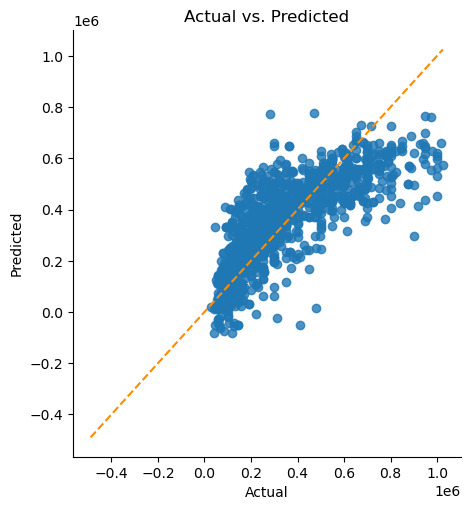

In [48]:
linear_assumption(model, X_train, y_train)

In [49]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 1.276754107321143e-13
Residuals are not normally distributed


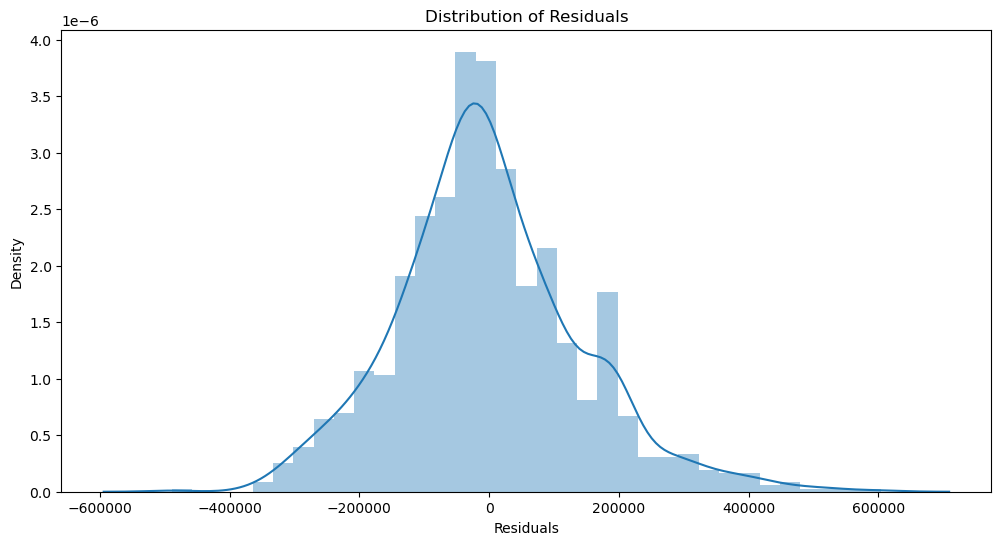


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [50]:
normal_errors_assumption(model,X_train, y_train)

In [51]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


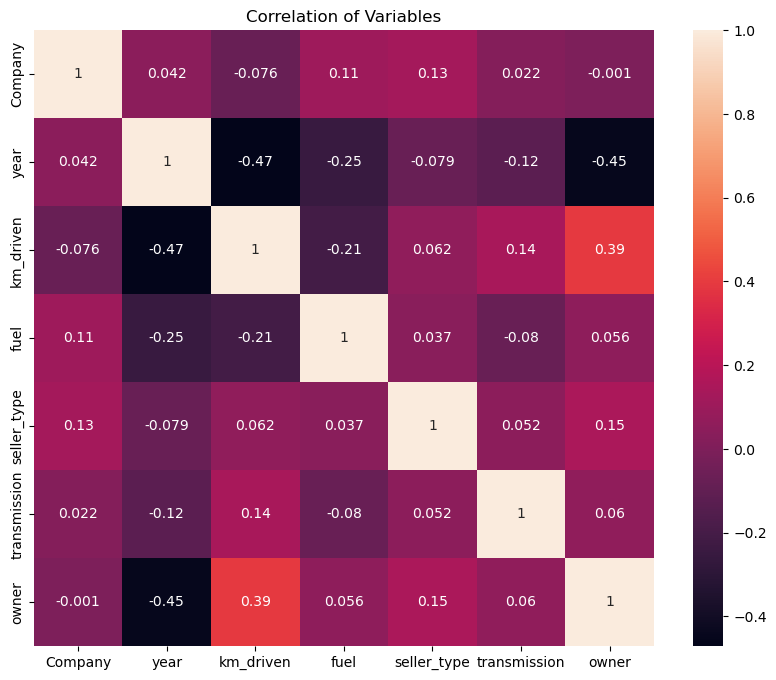

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Company: 6.9116123577013
year: 37.27854416764314
km_driven: 5.6093953442929365
fuel: 6.986265950653352
seller_type: 4.628380137002805
transmission: 21.293819177012807
owner: 1.7984118809256406

2 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [52]:
multicollinearity_assumption(model, X_train, y_train, dataset.iloc[:,[0,2,4,5,6,7,8]].columns.values)

In [53]:
def autocorrelation_assumption(model, features, label):
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [54]:
autocorrelation_assumption(model, X_train, y_train)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9862197068943392
Little to no autocorrelation 

Assumption satisfied


In [55]:
def homoscedasticity_assumption(model, features, label):
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


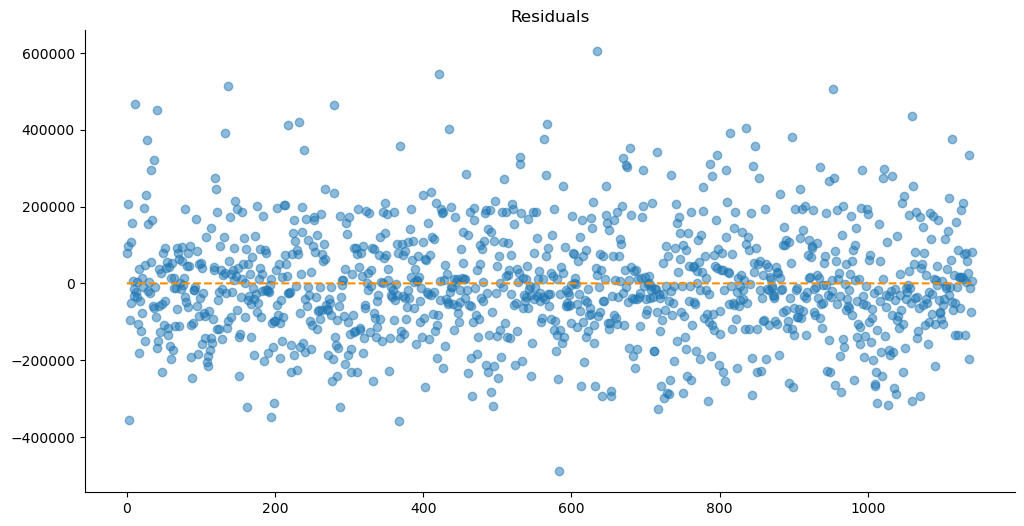

In [57]:
homoscedasticity_assumption(model, X_train, y_train)

In [60]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [62]:
model = sm.OLS(endog=y_train, exog=X_train).fit()

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     247.6
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          2.71e-223
Time:                        22:55:43   Log-Likelihood:                -15184.
No. Observations:                1142   AIC:                         3.038e+04
Df Residuals:                    1134   BIC:                         3.042e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.547e+07   2.67e+06    -20.765      0.000   -6.07e+07   -5.02e+07
x1          2.208e+04   6365.409      3.468      0.001    9586.795    3.46e+04
x2          2.788e+04   1321.443     21.100      0.000    2.53e+04    3.05e+04
x3            -1.0668      0.165     -6.457      0.000      -1.391      -0.743
x4         -7.839e+04   4938.838    -15.872      0.000   -8.81e+04   -6.87e+04
x5          1.577e+04   9507.705      1.659      0.097   -2881.986    3.44e+04
x6         -1.019e+05   2.03e+04     -5.016      0.000   -1.42e+05   -6.21e+04
x7         -1.201e+04   4003.969     -3.000      0.003   -1.99e+04   -4156.701
==============================================================================
Omnibus:                       56.511   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.193
Skew:                           0.463   Prob(JB):                     4.70e-17
Kurtosis:                       3.851   Cond. No.                     4.27e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
y_pred =model.predict(X_test)

# MLR Model after Removing Insignificant Variables

In [66]:
x = dataset.iloc[:,[0,2,4,5,7,8]].values
y = dataset.iloc[:,3:4].values

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [70]:
model_tuned = sm.OLS(endog=y_train, exog=X_train).fit()
y_pred = model_tuned.predict(X_test)
model_tuned.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.828
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                              778.9
Date:                Thu, 19 Sep 2024   Prob (F-statistic):                        0.00
Time:                        22:59:02   Log-Likelihood:                         -15401.
No. Observations:                1142   AIC:                                  3.082e+04
Df Residuals:                    1135   BIC:                                  3.085e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.958e+04   7703.511      3.840      0.000    1.45e+04    4.47e+04
x2           415.4279     16.336     25.430      0.000     383.376     447.480
x3            -2.4920      0.178    -14.005      0.000      -2.841      -2.143
x4          -1.07e+05   5421.927    -19.736      0.000   -1.18e+05   -9.64e+04
x5         -1.239e+04   1.19e+04     -1.043      0.297   -3.57e+04    1.09e+04
x6         -1.039e+05   2.53e+04     -4.110      0.000   -1.53e+05   -5.43e+04
x7         -3.534e+04   4753.713     -7.434      0.000   -4.47e+04    -2.6e+04
==============================================================================
Omnibus:                       42.535   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.416
Skew:                           0.475   Prob(JB):                     8.34e-11
Kurtosis:                       3.268   Cond. No.                     3.32e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Evaluation

In [71]:
class Model_Performance:
    def __init__(self,actual,predicted,count):
        self.actual = actual
        self.predicted = predicted
        self.count = count
        
    def mape(self):
        return (np.mean(np.abs((self.actual - self.predicted) / self.actual)))*(1/self.count)
    
    def mae(self):
        return (np.mean(np.abs((self.actual - self.predicted))))*(1/self.count)
    
    def mse(self):
        return (np.mean(np.abs((self.actual - self.predicted))))**2*(1/self.count)
    
    def rmse(self):
        return np.sqrt((np.mean(np.abs((self.actual - self.predicted))))**2*(1/self.count))

In [73]:
mp = Model_Performance(y_test,y_pred,len(y_test))
model = {'MODEL NAME':['Regression_model'],'MAPE':[mp.mape()],'MAE':[mp.mae()],'MSE':[mp.mse()], 'RMSE':[mp.rmse()]}

In [74]:
model

{'MODEL NAME': ['Regression_model'],
 'MAPE': [0.002041399645581002],
 'MAE': [456.57124540324554],
 'MSE': [102144078.04324463],
 'RMSE': [10106.635347297568]}

In [75]:
mp = Model_Performance(y_test,y_pred,len(y_test))
model_tuned = {'MODEL NAME':['Regression_Tuned'],'MAPE':[mp.mape()],'MAE':[mp.mae()],'MSE':[mp.mse()], 'RMSE':[mp.rmse()]}

In [76]:
model_tuned

{'MODEL NAME': ['Regression_Tuned'],
 'MAPE': [0.002041399645581002],
 'MAE': [456.57124540324554],
 'MSE': [102144078.04324463],
 'RMSE': [10106.635347297568]}

In [79]:
Final_Result = pd.concat([pd.DataFrame(model),pd.DataFrame(model_tuned)])

In [80]:
Final_Result

,MODEL NAME,MAPE,MAE,MSE,RMSE
0,Regression_model,0.002041,456.571245,1.021441e+08,10106.635347
0,Regression_Tuned,0.002041,456.571245,1.021441e+08,10106.635347


Overall there is a good increase in the R2 and Adjusted R2 values in the tuned model and there is a decrease in the MAE, MSE and RMSE. This is behaviour is good.